## What were the factors that determined Mastercard's success in the Financial Crisis? 

*By Ryan Lee and Yehoon (Paul) Kim*

**Introduction**

The financial crisis of 2008 has negatively impacted many companies across the world, including financial services companies. Many companies suffered huge losses, including banks, fund managers and credit card companies. The negative performance of financial services companies across the board has led to major stock price declines from 2007 to 2009. We decided to zoom in on credit card companies in our research report. We plan to delve into the potential drivers of both Mastercard and American Express's stock price performances. 

**Preliminaries**

In [3]:
import pandas as pd             # data package
import matplotlib.pyplot as plt # graphics 
import sys                      # system module, used to get Python version 
import os                       # operating system tools (check files)
import datetime as dt           # date tools, used to note current date  

%matplotlib inline 

print('\nPython version: ', sys.version) 
print('Pandas version: ', pd.__version__)

print("Today's date:", dt.date.today())


Python version:  3.5.1 |Anaconda 2.5.0 (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.17.1
Today's date: 2016-05-13


**Creating the Dataset**

We found the historical monthly stock price information of Mastercard and American Express using Yahoo Finance. Because Mastercard had a stock split in 2013, we recorded the adjusting closing monthly stock prices to standardize the process. We saved each sheet as a csv. Then, we read the files into pandas. The following code illustrates our process, and we renamed the dataframe *combo*.

In [4]:
url2 = '/Users/yhk31/Desktop/Data Bootcamp/mastercard_data.csv'
df2 = pd.read_csv(url2)
#df2 = df2[['Date', 'Adj Close']].drop_duplicates()
df2 =df2.drop('Close',1)
df2 =df2.drop('Open',1)
df2 =df2.drop('High',1)
df2 =df2.drop('Low',1)
df2 =df2.drop('Volume',1)

url3 = '/Users/yhk31/Desktop/Data Bootcamp/amex_data.csv'
df3 = pd.read_csv(url3)
#df3 = df3[['Date', 'Adj Close']].drop_duplicates()
df3 =df3.drop('Close',1)
df3 =df3.drop('Open',1)
df3 =df3.drop('High',1)
df3 =df3.drop('Low',1)
df3 =df3.drop('Volume',1)

combo = pd.merge(df2, df3,
                how='left',
                on='Date')
combo.columns=["Date","Mastercard", "American Express"]
combo

,Date,Mastercard,American Express
0,25/5/2006,4.319457,46.265919
1,1/6/2006,4.613572,45.295662
2,3/7/2006,4.408844,44.432590
3,1/8/2006,5.372889,44.842266
4,1/9/2006,6.761766,47.863613
5,2/10/2006,7.131420,49.472687
6,1/11/2006,9.792470,50.251450
7,1/12/2006,9.478725,51.920219
8,3/1/2007,10.744772,49.947044
9,1/2/2007,10.323843,48.788876


**Plotting the Data**

In [5]:
combo = combo.set_index("Date")

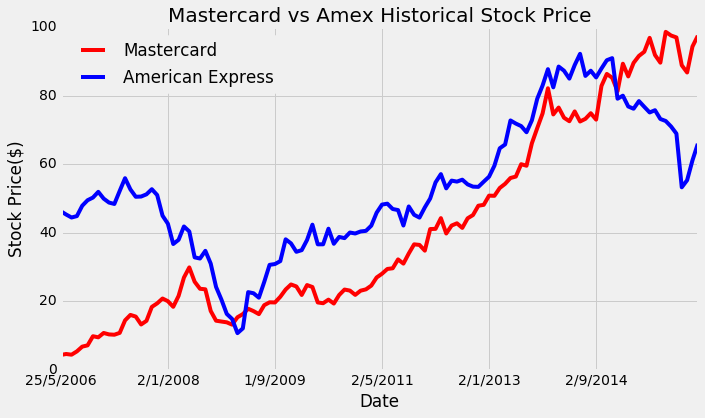

In [7]:
def plot_stock():
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    combo['Mastercard'].plot(ax=ax,
                kind='line', legend=True, color= 'r')
    combo['American Express'].plot(ax=ax, kind='line', legend=True, color='b')
    ax.set_ylabel('Stock Price($)')
    ax.set_title('Mastercard vs Amex Historical Stock Price', size=20)
    fig.tight_layout()
    plt.style.use('fivethirtyeight')

plot_stock()


**Initial Findings**

We noted that the stock price of Mastercard was a lot less volatile than that of American Express. Not only that, Mastercard also withstood the financial crisis successfully, as compared to Mastercard who had a monumental collapse from almost 60 per share to 10 per share. In comparison, MA's stock price rose from around 15 per share to 30 per share in that same period. 

**Initial Thesis**

We began by assuming that during the economic recession, consumers in general would take on more credit cards to pay for their existing debt - a short term solution to a major financial problem. Although this was the wrong thing to do, most people actually did this in order to pay off existing debt. American Express is widely known for focusing on high-income and good credit customers. Given their quality selection of customers, we did not understand why the company took huge impairment losses on their balance sheet. We believe that the reluctance of certain customers to turn to American express, due to its status, utlimately caused revenues to fall and eventually the decline of the stock price. 

However, this was not enough to fully explain the difference in stock price performance of the firms, who operated in the same industry. Hence, we started to look at other possiblities which could explain this disparity, in order to paint a better picture of what actually happened within the firms. 

**Possible Reasons**

We then looked to the profitability of the two companies to see if bottom line was the true determinant of the stock price performance. Howevever, we realized that net income was not an indicator of stock price performance at all. In 2008, Mastercard had negative earnings, while American Express had positive earnings. Hence, it is clear that net income is not a good indication of Mastercard's superior stock performance over the financial crisis.

We started to look to non-financial data in order to justify this disparity. In our report, we analyzed three different factors - debt, number of cards issued, and differences in business model. 

**1. Debt Analysis**

First, we wanted to take on a more macroeconomic perpsective to understand why people took on more credit during economic downturns. We looked to real median household income, and real average household debt to find a correlation between debt and performance of the firms in question. We extracted our data from *Nerd Wallet* to a csv file, and downloaded it as pandas. 


In [8]:
url4 ='/Users/yhk31/Desktop/Data Bootcamp/IncomeDebt.csv'
df4 = pd.read_csv(url4)
df4 = df4.set_index('Year')
df4

,Real Median Household Income,Real Average Household Debt
Year,,
2003,0.00,0.00
2004,0.31,8.11
2005,0.76,14.52
2006,1.56,23.30
2007,2.91,33.22
2008,-0.76,38.28
2009,-1.45,40.08
2010,-4.01,32.20
2011,-5.48,23.14


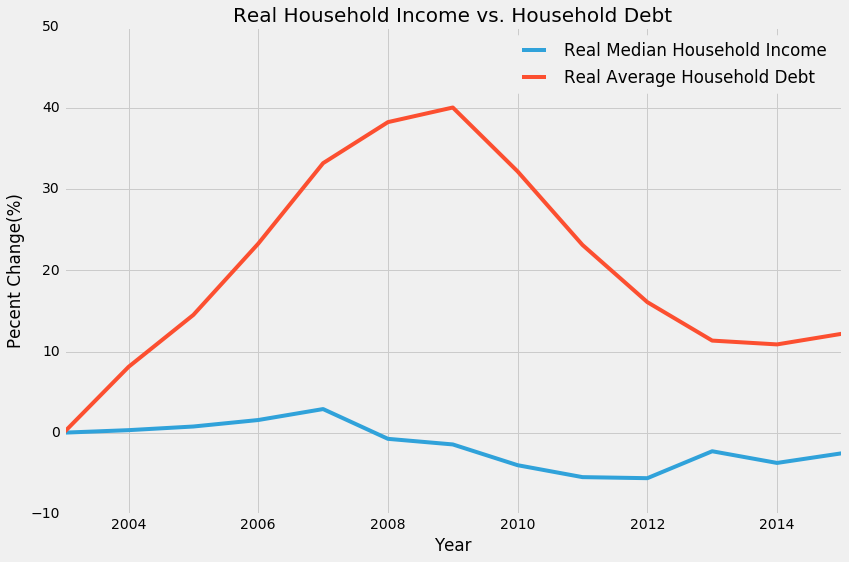

In [14]:
def plot_household():
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)
    df4['Real Median Household Income'].plot(ax=ax,
                    kind='line', legend=True)
    df4['Real Average Household Debt'].plot(ax=ax, kind='line', legend=True)
    ax.set_ylabel('Pecent Change(%)')
    ax.set_title('Real Household Income vs. Household Debt', size=20)
    fig.tight_layout()
    plt.style.use('fivethirtyeight')
    
plot_household()

The graph above illustrates the percent change of average household debt and household income from 2003 to 2015. As shown, real average household debt increased much faster than real median household income. In other words, people took on a lot more debt even though their incomes remained largely flat, esepcially during the 2006 to 2008 period. The increase from 2003 to 2005 suggests the economic reality - people took on more debt to finance extravagant purchases during the peak of the economic boom from 2006 to mid 2007. 

The debt they took on took a long time to be paid off, as credit was given to uncredit-worthy consumers. Hence, people who were used to easy credit started to take on more debt, due to habit, during the financial crisis from 2007 to 2009. Given that the debt-to-income ratio increased, we can assume that the crash of most financial services companies happend as a result of people trying to take on more credit cards in order to pay off their other credit card bills. 

As it was widely conceived that American Express credit cards required higher credit scores, people were looking more towards getting new credit cards from Mastercard, rather than American Express. 

**2. Number of Cards in Circulation**

However, this macroeconomic perspective on the situation does not explain the disparity between the performance of American Express and Mastercard. It explained how credit card companies suffered in the financial crisis. However, we decided to look to the number of cards in circulation to determine how the two companies responded to the influx of people looking for credit in a credit-strapped economy. The data below was extracted from *EuroMonitor*, *Mastercard*, and *American Express*. 

In [15]:
url5 ='/Users/yhk31/Desktop/Data Bootcamp/Credit.csv'
df5 = pd.read_csv(url5)
df5 = df5.set_index('Year')
df5

,MasterCard(%),American Express(%)
Year,,
2006,31,12
2007,6,11
2008,-7,2
2009,-26,-1
2010,-11,-11
2011,2,3
2012,-1,3
2013,2,3
2014,12,-5


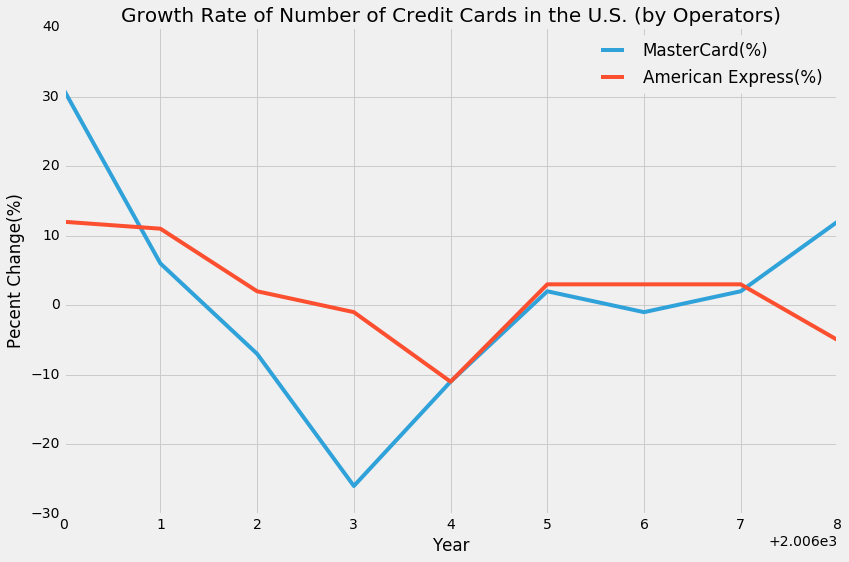

In [17]:
def plot_credit():
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)
    df5['MasterCard(%)'].plot(ax=ax,
                    kind='line', legend=True)
    df5['American Express(%)'].plot(ax=ax, kind='line', legend=True)
    ax.set_ylabel('Pecent Change(%)')
    ax.set_title('Growth Rate of Number of Credit Cards in the U.S. (by Operators)', size=20)
    fig.tight_layout()
    plt.style.use('fivethirtyeight')
    
plot_credit()

We plotted the growth rates of credit cards in the period above, from 2006 to 2014 (0 being year 2006). As illustrated above, we were surprised that the growth of Mastercard consumers fell dramatically, while that of American Express fell only slightly during the financial criss. It is important to note that the number of cards issued still increased, as this graph above simply illustrates the year-on-year growth rate of the cards. 

Hence, we turned to the different business models of the companies to try to explain this dissonance. After digging into their filings, we learnt that they adopted very different strategies during the crisis. American Express had a strong record of only accepting applicants with very strong credit. Hence, in theory, their customers would have low default risk in relation to their competitors. One of the downfalls of American Express was that they were so desperate to take on new customers to cover their losses, that in the midst of the economic chaos, they lowered their standards for accepting applicants.

On the other hand, Mastercard grouped together people of similar credit ratings. If one person in the group defaulted or did not pay, the others would have to contribute to make sure the group did not fail. Hence, they did not take in as many new customers as American Express, and consolidated their customers into "buckets" to try to help them instead of taking on new customers to cover their losses. Hence, their customer base did not increase as much as that of American Express, as seen in the graph above. 

We see Mastercard's strategy of grouping their existing customers as a superior strategy than that of American Express. One of the reasons why American Express suffered so much was because they lowered their standards in credit card applications. They thought they could weather the economic crisis by taking a higer interest rate of customers who were in financial trouble, without fully understanding that they were simply unable to pay their bills. In contrary, Mastercard effectively tackled the solution to the financial crisis, by helping their existing customer base pay off their loans - essentially creating a win-win situation for the firm and the customers. 

**3. Debit vs. Credit Cards**

However, our data should be viewed objectively, in terms of the differences in revenue streams for both companies. Even though Mastercard enjoyed more stock price success during the financial crisis as opposed to American Express, we should also point out that both companies have different business models. While American Express operates only in the credit card business, Mastercard operates in both the credit and debit card businesses. 

Debit cards operate in a different sphere that credit cards. Instead of drawing from a line of credit, a debit card automatically withdraws funds from an attached bank account, hence combining the function of both an ATM card and checks. As a result, the revenue streams from debit cards are a lot more stable than that of credit cards. However, the interest rates on debit cards are a lot lower, which drives down margins for Mastercard. As a result, having a steady stream of revenues from debit cards could prove to be a good balance to the relative volatility of credit cards. 

During financial crises, debit card revenues are more stable than credit card revenues. Hence, this could be a potential reason why Mastercard stock outperformed American Express' stock in the financial crisis. 

**Concluding Remarks**

Even though Mastercard enjoyed more stock price success during the financial crisis as opposed to American Express, we can see from the initial plot that American Express' stock has risen dramatically since then, almost catching up with Mastercard in 2014. This is because American Express has since been attempting to diversify its revenues. In 2011, American Express set up a prepaid debit card account to better weather economic downturns in the future. 

In addition, as seen in the stock price graph above, American Express' stock has dipped slightly in the past year. This is because of American Express used to have an exclusive partnership with Costco, which had expired in 2015. They lost that contract to Visa, which managed to outbid them for the partership. As a result, the market did not take well to this, which resulted in an 11% drop in stock price. 

Based on our analysis, we see that historically, American Express did not fare well with a singular business model of credit cards. Based on recent events, we see American Express diversifying into prepaid debit cards as a necessary first step into reducing its stock price volatility, while sharing in the same successes and footsteps as Mastercard. 

**Moving Forward**

Moving forward, we see a few interesting trends in the credit card space. First, there has been a flattening of interest rates on credit cards. A few years back, the variablility on interest rates depended solely on credit scores. However, consumers have become more savy, and began to shop around for different cards based on product differentiation. Some cards gave dollar rebates on restaurant orders, while some offered reward programs to entice consumers. We see this as a positive signs for both companies to dominate the credit card space based on the consumers they want to cater to.

Another interesting trend that is more applicable to the changing face of American Express is the rise of the zero percent introductory rate. While it seems commonplace today, zero percent APRs were virtually non-existent a few years ago. In order to differentiate their products, companies like American Express started to offer zero percent for longer periods of time, with some firms extending the introductory period for up to two years. 

In conclusion, we see Mastercard and American Express starting to diversify their revenue streams into both credit and debit cards. Specifically to credit cards, we see trends of firms trying to differentiate their products based on reward programs, rebates, and extending the zero percent introductory rates to better entice savy consumers. It will be interesting to see how these firms attempt to balance investments in credit card research and data analytics while diversifying their revenues. While Mastercard seems to have a stronger foothold than American Express, we should not be quick to rule out American Express. Given its recent stock price weaknesses, we feel that it is a prime time for American Express to properly define its brand and business model to compete with other bigger players.   

**References**

MasterCard 10-K : 2007 to 2014


American Express 10-K : 2007 to 2014 


Yahoo Finance


Nerdwallet:https://www.nerdwallet.com/blog/credit-card-data/average-credit-card-debt-household/


Eurowallet: http://ezproxy.library.nyu.edu:2442/portal/analysis/tab